In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-commerce-data/WalmartSQL repository..csv


In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import torch 
from torch import nn
import plotly.express as px

In [4]:
df = pd.read_csv("/kaggle/input/walmart-commerce-data/WalmartSQL repository..csv", sep=';')
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,dtme,tme,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00,13:08:00,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 00:00:00,10:29:00,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,20:33:00,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00,10:37:00,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   invoice_id        1000 non-null   object 
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_line      1000 non-null   object 
 6   unit_price        1000 non-null   float64
 7   quantity          1000 non-null   int64  
 8   vat               1000 non-null   float64
 9   total             1000 non-null   float64
 10  dtme              1000 non-null   object 
 11  tme               1000 non-null   object 
 12  payment_method    1000 non-null   object 
 13  cogs              1000 non-null   float64
 14  gross_margin_pct  1000 non-null   float64
 15  gross_income      1000 non-null   float64
 16  rating            1000 non-null   float64
 

<Axes: >

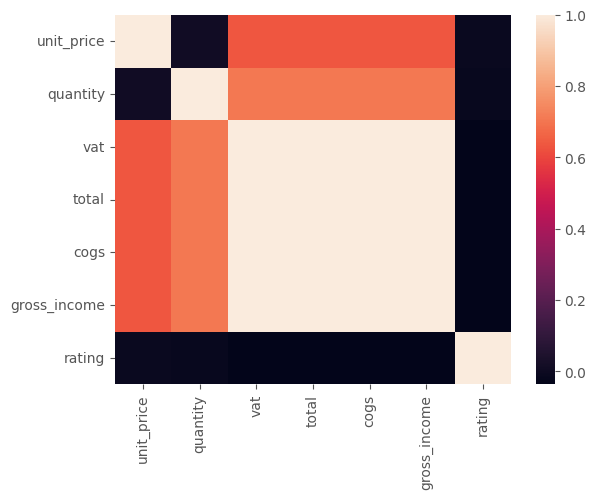

In [6]:
corr = df.drop(columns='gross_margin_pct').corr(numeric_only=True)
sns.heatmap(corr)

In [7]:
corr['rating']

unit_price     -0.008778
quantity       -0.015815
vat            -0.036442
total          -0.036442
cogs           -0.036442
gross_income   -0.036442
rating          1.000000
Name: rating, dtype: float64

Customer Breakdown by type,gender, product preference, payment method

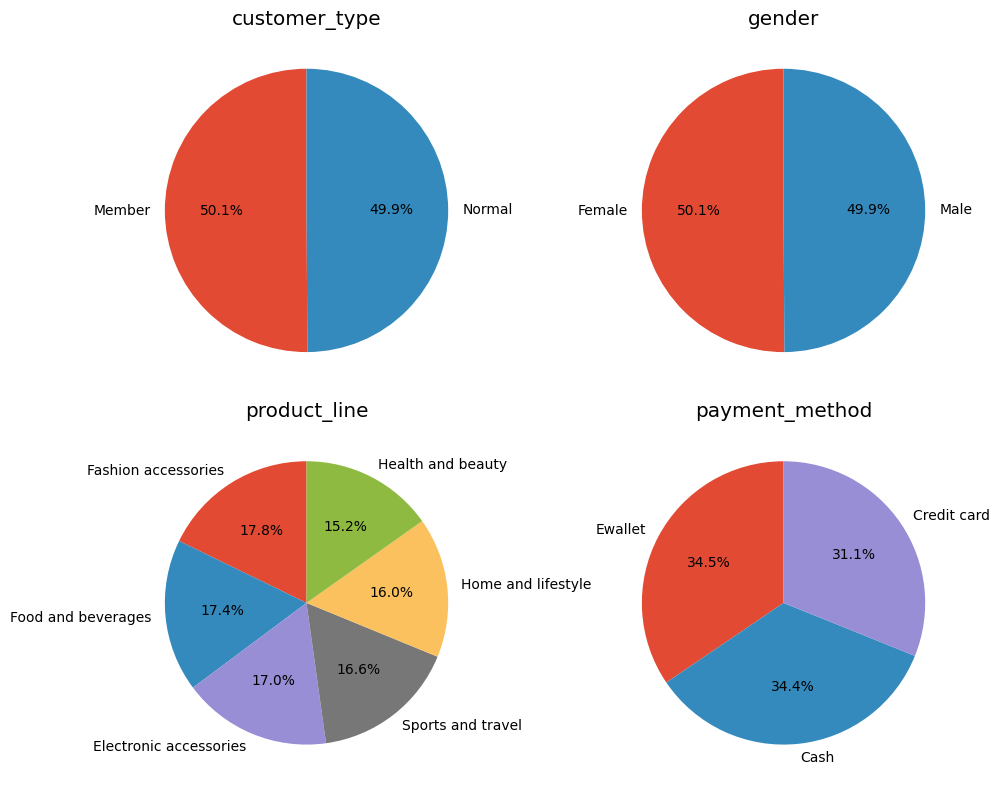

In [9]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and pies is your list of categorical variables
# Define df and pies before executing this code

pies = ["customer_type", "gender", "product_line", "payment_method"]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Initialize index
index = 0

# Loop through the subplots
for i in range(2):
    for j in range(2):
        # Get value counts for the current pie chart
        grph = df[pies[index]].value_counts()
        # Plot the pie chart
        axes[i, j].pie(grph, labels=grph.index, autopct='%1.1f%%', startangle=90)
        # Add a title for the pie chart
        axes[i, j].set_title(pies[index])
        # Increment index
        index += 1

# Adjust layout and display plot
plt.tight_layout()
plt.show()



In [12]:
for i in range(len(pies)-1):
    for j in range(i+1, len(pies)):
        fig = px.treemap(df, path=[pies[i], pies[j]], color_continuous_scale='viridis')
        fig.show()


In [23]:
import plotly.express as px

for i in range(len(pies)-1):
    for j in range(i+1, len(pies)):
        fig = px.parallel_categories(df[[pies[i], pies[j]]])
        fig.show()
        print(pd.crosstab(df[pies[i]], df[pies[j]]))


gender         Female  Male
customer_type              
Member            261   240
Normal            240   259


product_line   Electronic accessories  Fashion accessories  \
customer_type                                                
Member                             78                   86   
Normal                             92                   92   

product_line   Food and beverages  Health and beauty  Home and lifestyle  \
customer_type                                                              
Member                         94                 73                  83   
Normal                         80                 79                  77   

product_line   Sports and travel  
customer_type                     
Member                        87  
Normal                        79  


payment_method  Cash  Credit card  Ewallet
customer_type                             
Member           168          172      161
Normal           176          139      184


product_line  Electronic accessories  Fashion accessories  Food and beverages  \
gender                                                                          
Female                            84                   96                  90   
Male                              86                   82                  84   

product_line  Health and beauty  Home and lifestyle  Sports and travel  
gender                                                                  
Female                       64                  79                 88  
Male                         88                  81                 78  


payment_method  Cash  Credit card  Ewallet
gender                                    
Female           178          163      160
Male             166          148      185


payment_method          Cash  Credit card  Ewallet
product_line                                      
Electronic accessories    71           46       53
Fashion accessories       57           56       65
Food and beverages        57           61       56
Health and beauty         49           50       53
Home and lifestyle        51           45       64
Sports and travel         59           53       54


Average spending based on Customer type, Gender and Rating

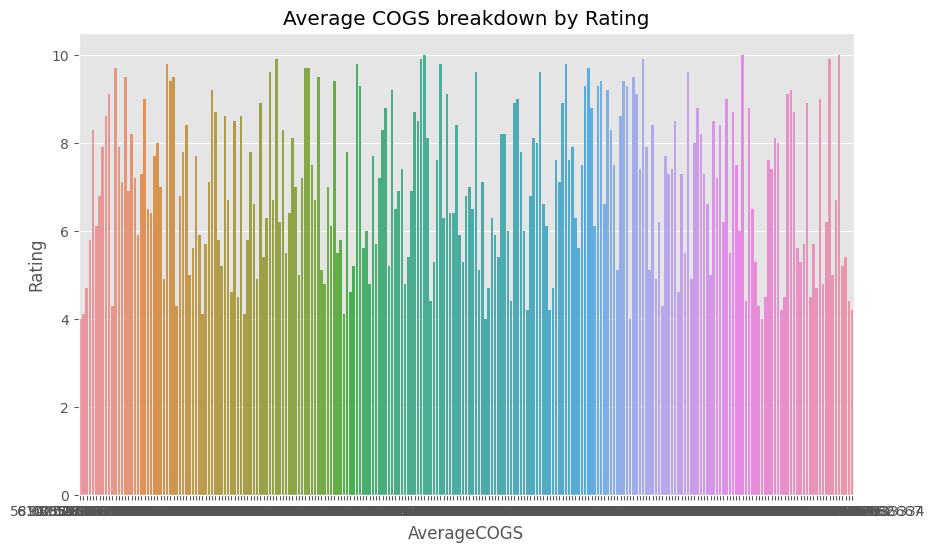

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named avg_cogs_breakdown
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.line(data=avg_cogs_breakdown, x='cogs', y='rating', errorbar=None)
plt.title('Average COGS breakdown by Rating')
plt.xlabel('AverageCOGS')
plt.ylabel('Rating')
plt.show()


    customer_type  gender  rating        cogs
0          Member  Female     4.0  460.546667
1          Member  Female     4.1  190.763750
2          Member  Female     4.2  324.920000
3          Member  Female     4.3  383.517500
4          Member  Female     4.4  306.997500
..            ...     ...     ...         ...
236        Normal    Male     9.6  396.900000
237        Normal    Male     9.7  244.410000
238        Normal    Male     9.8  333.338000
239        Normal    Male     9.9  228.516000
240        Normal    Male    10.0  560.340000

[241 rows x 4 columns]


/tmp/ipykernel_33/3253482683.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




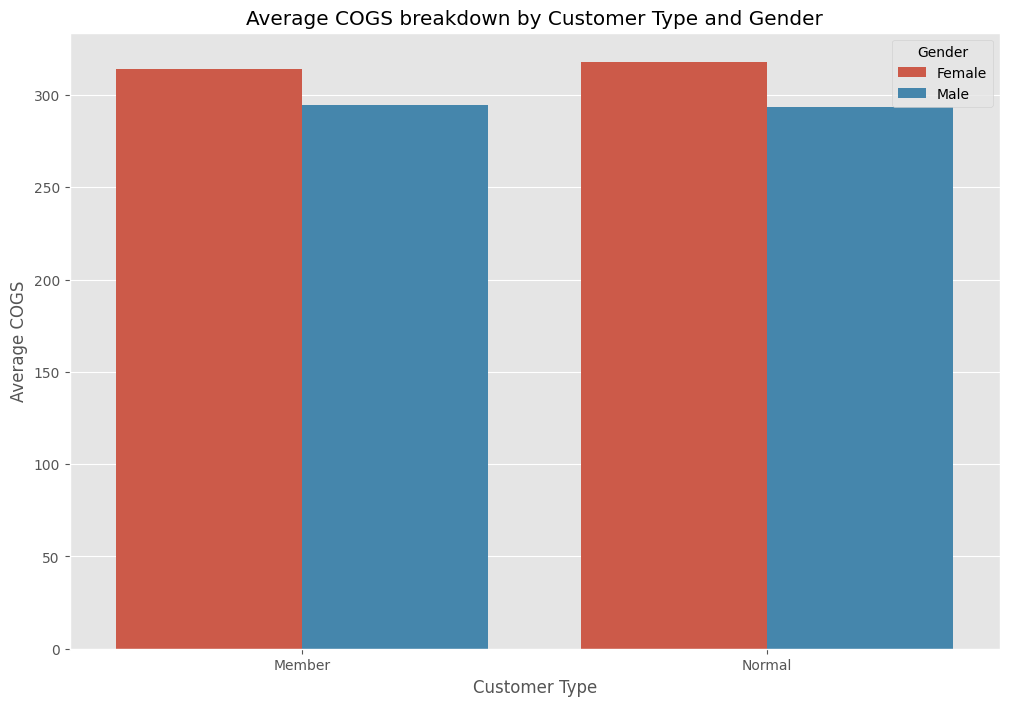

In [31]:
avg_cogs_breakdown = df.groupby(['customer_type', 'gender', 'rating'])['cogs'].mean().reset_index()

# Printing the result
print(avg_cogs_breakdown)

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_cogs_breakdown, x='customer_type', y='cogs', hue='gender', ci=None)
plt.title('Average COGS breakdown by Customer Type and Gender')
plt.xlabel('Customer Type')
plt.ylabel('Average COGS')
plt.legend(title='Gender')
plt.show()



**Conslusion: Females Member or Non Member tend to spend on average more than Men from both categories.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



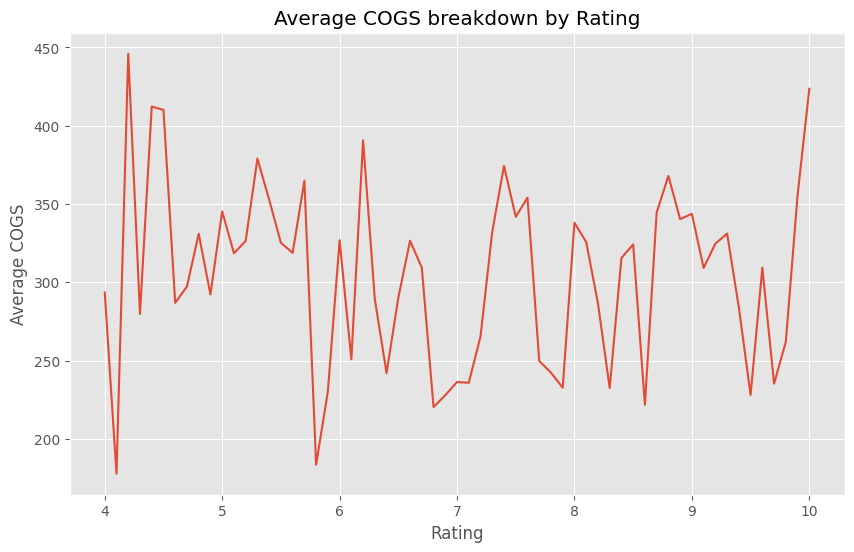

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_cogs_breakdown, x='rating', y='cogs', errorbar=None)
plt.title('Average COGS breakdown by Rating')
plt.xlabel('Rating')
plt.ylabel('Average COGS')
plt.show()

**Conclusion: As seen by the line plot, Average amount spent at the store has no relation to the rating they provide.**

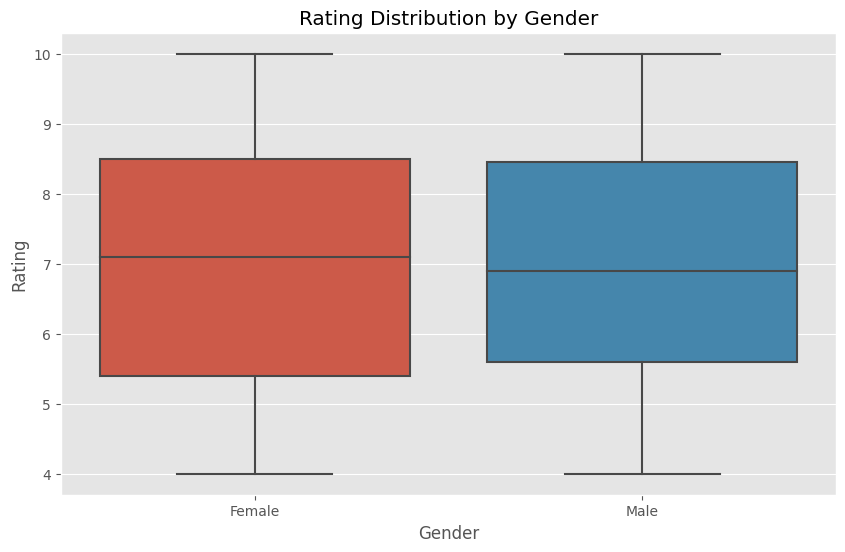

In [45]:

# Plotting a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='rating')
plt.title('Rating Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()


**Conclusion: As seen by the box plot, Gender of the customer has no relation to the rating they provide.**